In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('C:/Users/Dell/Desktop/Real world project/Zomato Data Analysis/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [19]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [20]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [21]:
df.shape

(51717, 17)

In [22]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [23]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [24]:
len(df)

51717

# for number  of missing values

In [25]:
for feature in feature_na:
    print('{} has {} missing values'.format(feature,df[feature].isnull().sum()))

rate has 7775 missing values
phone has 1208 missing values
location has 21 missing values
rest_type has 227 missing values
dish_liked has 28078 missing values
cuisines has 45 missing values
approx_cost(for two people) has 346 missing values


# For percentage of missing values

In [26]:
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,df[feature].isnull().sum()/len(df)*100))

rate has 15.033741322969234 % missing values
phone has 2.335789005549432 % missing values
location has 0.04060560357329312 % missing values
rest_type has 0.438927238625597 % missing values
dish_liked has 54.29162557766305 % missing values
cuisines has 0.08701200765705668 % missing values
approx_cost(for two people) has 0.669025658874258 % missing values


# For rounding up  percentage to two digit

In [27]:
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,2)))

rate has 15.03 % missing values
phone has 2.34 % missing values
location has 0.04 % missing values
rest_type has 0.44 % missing values
dish_liked has 54.29 % missing values
cuisines has 0.09 % missing values
approx_cost(for two people) has 0.67 % missing values


# Finding & Dropping missing or irrelevent values

In [28]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [30]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [31]:
df.shape

(43942, 17)

In [32]:
def split(x):
    return x.split('/')[0]

In [33]:
df['rate'] = df['rate'].apply(split)

In [34]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Replacing the irrelevant values

In [35]:
df.replace('NEW',0,inplace=True)

In [36]:
df.replace('-',0,inplace=True)

In [37]:
df['rate'] = df['rate'].astype(float)

In [38]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [47]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Calculating average rating of Restaurant

In [39]:
df.groupby('name')['rate'].mean()

name
#FeelTheROLL                                    3.400000
#L-81 Cafe                                      3.900000
#refuel                                         3.700000
1000 B.C                                        3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C            3.700000
                                                  ...   
i-Bar - The Park Bangalore                      3.800000
iFruit Live Ice Creams                          3.400000
iSpice Resto Cafe                               3.700000
nu.tree                                         4.314286
re:cess - Hilton Bangalore Embassy GolfLinks    4.100000
Name: rate, Length: 7162, dtype: float64

In [40]:
df.groupby('name')['rate'].mean().to_frame()

,rate
name,
#FeelTheROLL,3.400000
#L-81 Cafe,3.900000
#refuel,3.700000
1000 B.C,3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...
i-Bar - The Park Bangalore,3.800000
iFruit Live Ice Creams,3.400000
iSpice Resto Cafe,3.700000


In [58]:
# plotting the average  rating  of restaurant

<AxesSubplot:xlabel='name'>

C:\Users\Dell\.conda\envs\rstudio\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\.conda\envs\rstudio\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


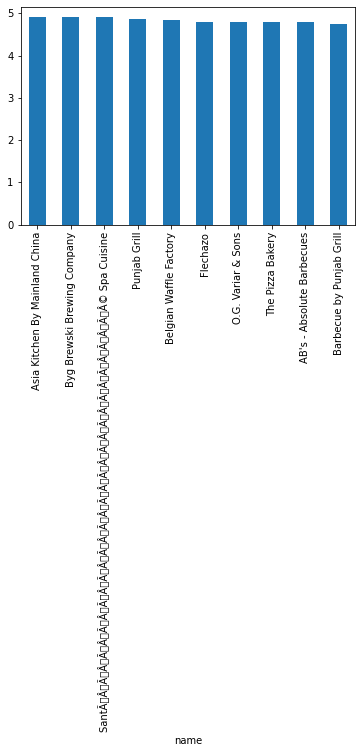

In [41]:
df.groupby('name')['rate'].mean().nlargest(10).plot.bar()

# Formating Table

In [42]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate

,name,rate
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...,...
7157,i-Bar - The Park Bangalore,3.800000
7158,iFruit Live Ice Creams,3.400000
7159,iSpice Resto Cafe,3.700000
7160,nu.tree,4.314286


In [43]:
df_rate.head(20)

,name,rate
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


In [90]:
# Renaming tables

In [44]:
df_rate.columns=['Resturant','Avg_rating']

In [45]:
df_rate.head(10)

,Resturant,Avg_rating
0,#FeelTheROLL,3.400
1,#L-81 Cafe,3.900
2,#refuel,3.700
3,1000 B.C,3.200
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700
5,11 to 11 Express Biriyanis,3.500
6,1131 Bar + Kitchen,4.500
7,12th Main - Grand Mercure,4.100
8,1441 Pizzeria,4.100
9,1522 - The Pub,4.212


In [104]:
# Plotting the table in matplotlib & seaborn for distrubution

<AxesSubplot:xlabel='Avg_rating', ylabel='Count'>

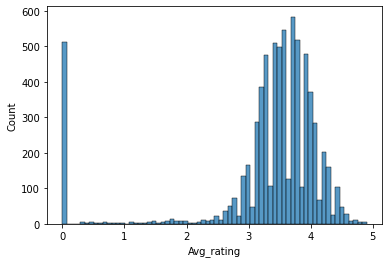

In [46]:
sns.histplot(df_rate['Avg_rating'])

C:\Users\Dell\.conda\envs\rstudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_rating', ylabel='Density'>

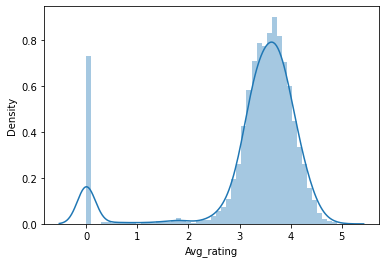

In [47]:
sns.distplot(df_rate['Avg_rating'])

In [117]:
# To find Top resturant chains in Banglore

Text(0, 0.5, 'Name of restaurant chains')

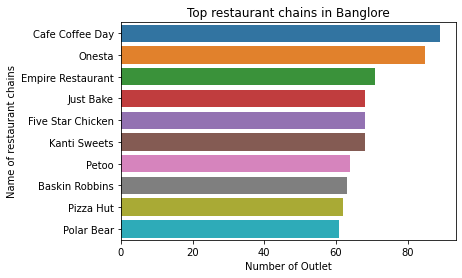

In [48]:
chains=df['name'].value_counts()[0:10]
P=sns.barplot(x=chains,y=chains.index)
P.set_title("Top restaurant chains in Banglore")
P.set_xlabel("Number of Outlet")
P.set_ylabel("Name of restaurant chains")

In [153]:
# Calculate how many restaurants accepts Online Order

In [49]:
x=df['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

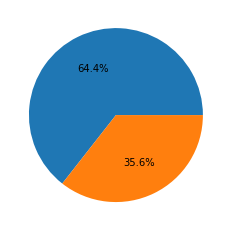

In [50]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.pie(x,autopct='%1.1f%%')
plt.show

In [264]:
#What is the ratio b/w restaurants that provide and do not provide table booking ?

In [51]:
x=df['book_table'].value_counts()
x

No     37509
Yes     6433
Name: book_table, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

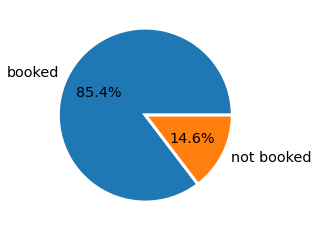

In [52]:
x=df['book_table'].value_counts()
labels=['booked','not booked']
plt.pie(x,labels=labels,autopct='%1.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.show


In [307]:
#Types of resturant  using seaborn

In [53]:
df['rest_type'].isna().sum()

151

In [54]:
df['rest_type'].dropna(inplace=True)

In [55]:
df['rest_type'].head()

0          Casual Dining
1          Casual Dining
2    Cafe, Casual Dining
3            Quick Bites
4          Casual Dining
Name: rest_type, dtype: object

In [56]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [57]:
len(df['rest_type'].unique())

88

In [58]:
x=df['rest_type'].value_counts()
x

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

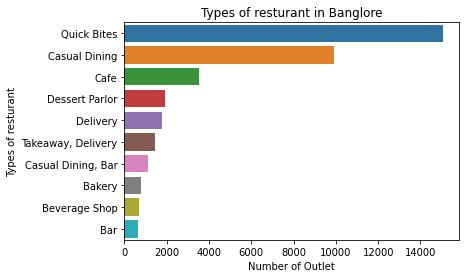

In [59]:
chains=df['rest_type'].value_counts()[0:10]
P=sns.barplot(x=chains,y=chains.index)
P.set_title("Types of resturant in Banglore")
P.set_xlabel("Number of Outlet")
P.set_ylabel("Types of resturant")
plt.show

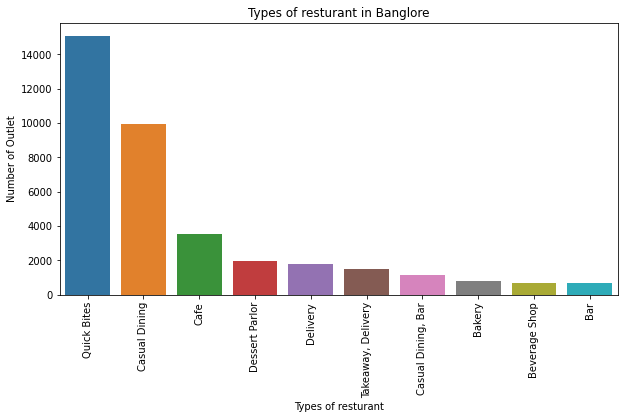

In [60]:
plt.figure(figsize=(10,5))
chains=df['rest_type'].value_counts()[0:10]
P=sns.barplot(x=chains.index,y=chains)
P.set_title("Types of resturant in Banglore")
P.set_xlabel("Types of resturant")
P.set_ylabel("Number of Outlet")
plt.xticks(rotation='vertical')
plt.show()

In [371]:
#highest voted restaurant


<AxesSubplot:xlabel='name'>

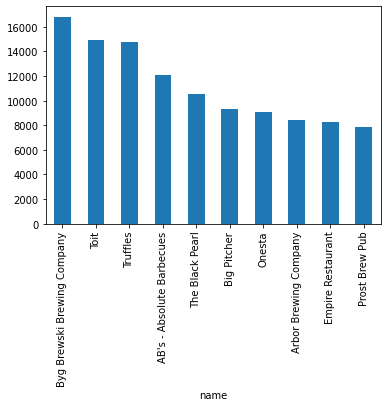

In [62]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar()

In [64]:
#Total restaurant at diffrent location at Banglore

In [67]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [74]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.head()

,location,restaurant
0,BTM,581
1,Banashankari,238
2,Banaswadi,151
3,Bannerghatta Road,362
4,Basavanagudi,195


In [75]:
df_total.set_index('location', inplace= True)
df_total.head()

,restaurant
location,
BTM,581
Banashankari,238
Banaswadi,151
Bannerghatta Road,362
Basavanagudi,195


<AxesSubplot:xlabel='location'>

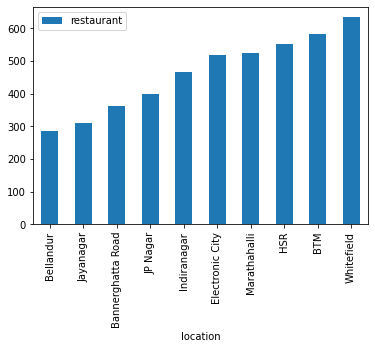

In [89]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()

In [92]:
#Analyse cost for two person and find relationship with rating of the resutrants


In [93]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [95]:
df['approx_cost(for two people)'].isna().sum()

252

In [99]:
df.dropna(axis='index', subset=['approx_cost(for two people)'], inplace= True)

In [101]:
df['approx_cost(for two people)'].dtype


dtype('O')

In [102]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [107]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: x.replace(',', ''))

In [109]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [111]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [113]:
df['approx_cost(for two people)'].dtype

dtype('int32')

C:\Users\Dell\.conda\envs\rstudio\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

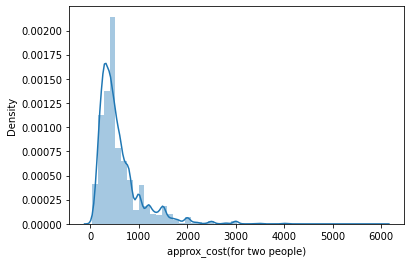

In [115]:
sns.distplot(df['approx_cost(for two people)'])

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

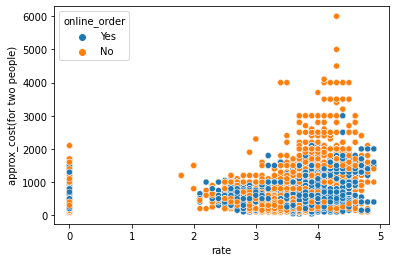

In [117]:
sns.scatterplot(x='rate',y='approx_cost(for two people)',hue='online_order',data=df)

<AxesSubplot:xlabel='online_order', ylabel='votes'>

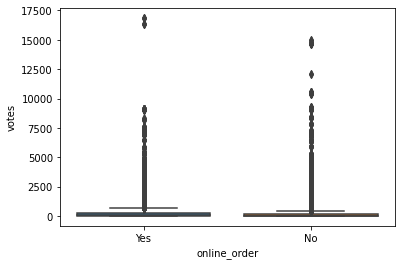

In [120]:
sns.boxplot(x='online_order',y='votes',data=df)

In [121]:
# Total restaurant that have rating >4 and that are budget too less than 400 for cost of two

In [124]:
df[(df['rate']>4) & (df['approx_cost(for two people)']<=400)].shape

(1713, 17)

In [128]:
df[(df['rate']>4) & (df['approx_cost(for two people)']<=400)]['name'].unique()

array(['Shree Cool Point', 'Corner House Ice Cream', 'Kabab Magic',
       'The Biryani Cafe', 'Sri Guru Kottureshwara Davangere Benne Dosa',
       'Frozen Bottle', 'Bengaluru Coffee House',
       'The Blue Wagon - Kitchen', 'HOT COFFEE',
       'Dev Sagar - Food Street', 'Shakes Theory', "Kedia's Fun Food",
       'Mini Punjabi Dhaba', 'Cool Corner', 'Mystique Palate',
       'Karma Kaapi', 'The Lassi Park', 'South Kitchen',
       'Prems Graama Bhojanam', 'Puliyogare Point', 'Udupi Ruchi Grand',
       'Chai Kraft', 'Karnataka Bhel House', 'Sreeraj Lassi Bar',
       'Ayodhya Upachar', 'Poonam Sweets', 'Taaza Thindi',
       'Sri Laxmi Venkateshwara Coffee Bar', 'SLV Refreshment',
       'Ranganna Military Hotel', 'Vidyarthi Bhavan', 'Hotel Dwarka',
       'Upahara Darshini', 'Mahalaxmi Tiffin Room', 'Easy Bites',
       'XO Belgian Waffle', 'Swadista Aahar', 'Litti Twist',
       'A2B - Adyar Ananda Bhavan', 'The Shawarma Shop',
       'Amritsari Kulcha Land', 'Gorbandh', 'Yum In 

In [130]:
len(df[(df['rate']>4) & (df['approx_cost(for two people)']<=400)]['name'].unique())

291

In [135]:
df_new=df[(df['rate']>4) & (df['approx_cost(for two people)']<=400)]
df_new.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51,https://www.zomato.com/bangalore/shree-cool-po...,"1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...",Shree Cool Point,Yes,No,4.1,28,+91 9900617124,Vijay Nagar,Quick Bites,NaN,"Fast Food, Street Food, Beverages",150,"[('Rated 5.0', 'RATED\n Who would say no to s...","['Vegetable Sandwich', 'Vegetable Sandwich wit...",Delivery,Banashankari
52,https://www.zomato.com/bangalore/corner-house-...,"808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...",Corner House Ice Cream,No,No,4.3,345,080 26713965\r\n+91 9845444155,Banashankari,Dessert Parlor,"Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...","Ice Cream, Desserts",400,"[('Rated 3.0', ""RATED\n Always a fan of corne...",[],Delivery,Banashankari
65,https://www.zomato.com/bangalore/kabab-magic-b...,"31, Opposite Vijaya College, RV Road, Basavana...",Kabab Magic,Yes,No,4.1,1720,080 26570381,Basavanagudi,Quick Bites,"Grape Juice, Chicken Grill, Chicken Tikka Roll...","North Indian, Kebab, Chinese, Fast Food",400,"[('Rated 4.0', 'RATED\n BEST SHAWARMA EVER!\n...",[],Delivery,Banashankari
71,https://www.zomato.com/bangalore/the-biryani-c...,"476, 2nd Floor, 9th Cross, Avalahalli BDA Park...",The Biryani Cafe,No,No,4.1,520,+91 7010846043,Banashankari,Quick Bites,"Vegetable Biryani, Ginger Chicken, Chicken Bir...","Biryani, Chinese, Kebab",300,"[('Rated 5.0', 'RATED\n People who are always...",[],Delivery,Banashankari
76,https://www.zomato.com/bangalore/sri-guru-kott...,"49/1, Subbaraoshetty Road, Netkallappa Circle,...",Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,558,+91 9448305384\r\n+91 9060079480,Basavanagudi,Quick Bites,"Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...",South Indian,150,"[('Rated 4.0', 'RATED\n My go-to benne dosa p...","['Benne Dose', 'Benne Kali Dose', 'Open Dose',...",Delivery,Banashankari


In [137]:
# Best budget hotel in any location

In [139]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [142]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

In [148]:
#Plot major food areas in banglore

C:\Users\Dell\.conda\envs\rstudio\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='location'>

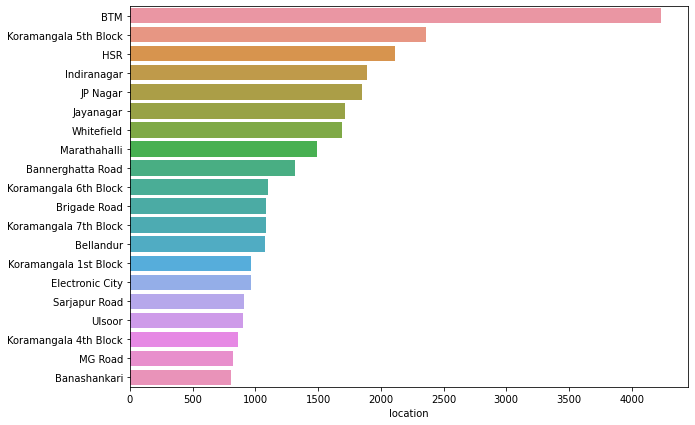

In [144]:
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:20]
sns.barplot(Restaurant_locations,Restaurant_locations.index)